# Notebook para generar dataset 

Con este noteook se pretende crear los notebooks (reducido y completo) para el entrenamiento de modelos de detección de objetos usando como base el dataset TACO.


# 1. Descarga del dataset TACO

In [309]:
# descarga del dataset desde kagglehub
# Instalamos librerias 
try:
    import os
    import kagglehub
    print("Todas las librerías ya están instaladas")
except ImportError:
    !pip install kagglehub
    import kagglehub
    print("Instalación completada")

# Establecer la carpeta actual como caché
os.environ["KAGGLEHUB_CACHE"] = os.getcwd()

# Ruta esperada del dataset
dataset_path = os.path.join(os.getcwd(),"datasets/kneroma/tacotrashdataset")
print (dataset_path)
# Verificar si ya existe
if os.path.isdir(dataset_path):
    print("El dataset ya está descargado en:", dataset_path)
else:
    # Descargar solo si no existe - latest version
    path = kagglehub.dataset_download("kneroma/tacotrashdataset", force_download=True)
    print("Dataset descargado en:", path)


Todas las librerías ya están instaladas
/home/marck/Documents/UBA/VpC2_Vision_por_computadora_2/CV-II/datasets/kneroma/tacotrashdataset
El dataset ya está descargado en: /home/marck/Documents/UBA/VpC2_Vision_por_computadora_2/CV-II/datasets/kneroma/tacotrashdataset


In [310]:
# Otras instalaciones 
try:
    from pycocotools.coco import COCO
    print("Todas las librerías ya están instaladas")
except ImportError:
    !pip install pycocotools
    from pycocotools.coco import COCO
    print("Instalación completada")

Todas las librerías ya están instaladas


In [311]:
# Esta variable define la ruta al dataset descargado. Se usa goblamente en el archivo
taco_trash_dataset_data_path = 'datasets/kneroma/tacotrashdataset/versions/3/data'

# 2. Limpieza del archivo de anotaciones
Cada celda es independiente por lo que se puede decidir no ejecutar ciertas celdas o ejecutarlas todas a la vez. De modo que se puedan obtener diferentes archivos de anotaciones limpios.

Esta sección puede no ser ejecutada y se puede obtener un dataset sin ninguna modificación de los datos originales.

In [312]:
import json
# variable usada para cargar las anotaciones y crear el nuevo archivo limpio
with open(f'{taco_trash_dataset_data_path}/annotations.json', 'r', encoding='utf-8') as f:
    annotations_cleaned = json.load(f)

In [313]:

import json
# variable usada para cargar las anotaciones. se usa para comparar la cantidad de categorías antes y después de la limpieza
with open(f'{taco_trash_dataset_data_path}/annotations.json', 'r', encoding='utf-8') as f:
    annotations = json.load(f)

annotations

{'info': {'year': 2019,
  'version': None,
  'description': 'TACO',
  'contributor': None,
  'url': None,
  'date_created': '2019-12-19T16:11:15.258399+00:00'},
 'images': [{'id': 0,
   'width': 1537,
   'height': 2049,
   'file_name': 'batch_1/000006.jpg',
   'license': None,
   'flickr_url': 'https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png',
   'coco_url': None,
   'date_captured': None,
   'flickr_640_url': 'https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg'},
  {'id': 1,
   'width': 1537,
   'height': 2049,
   'file_name': 'batch_1/000008.jpg',
   'license': None,
   'flickr_url': 'https://farm66.staticflickr.com/65535/47803331152_ee00755a2e_o.png',
   'coco_url': None,
   'date_captured': None,
   'flickr_640_url': 'https://farm66.staticflickr.com/65535/47803331152_19beae025a_z.jpg'},
  {'id': 2,
   'width': 1537,
   'height': 2049,
   'file_name': 'batch_1/000010.jpg',
   'license': None,
   'flickr_url': 'https://farm66.staticflickr.com/65535/

## Eliminación de imágenes que presenten elementos sin etiquetar

In [314]:
# IDs tomadas del archivo EDA_automatico.ipynb
arr_id_bad_imgs = [98, 718, 1111, 1393, 1456, 130]

annotations_cleaned['images'] = [
    ann for ann in annotations_cleaned['images'] if ann['id'] not in arr_id_bad_imgs
]

print(f"Original annotations count: {len(annotations['images'])}")
print(f"Cleaned annotations count: {len(annotations_cleaned['images'])}")

Original annotations count: 1500
Cleaned annotations count: 1494


## Eliminación de imágenes con sólo una anotación (anotación poco clara)

In [315]:
# IDs tomadas del archivo EDA_automatico.ipynb
arr_id_bad_imgs2 = [909, 920, 942, 957, 528]

annotations_cleaned['images'] = [
    ann for ann in annotations_cleaned['images'] if ann['id'] not in arr_id_bad_imgs2
]

print(f"Original annotations count: {len(annotations['images'])}")
print(f"Cleaned annotations count: {len(annotations_cleaned['images'])}")

Original annotations count: 1500
Cleaned annotations count: 1489


## Eliminación de imágenes con excesiva cantidad de anotaciones

In [316]:
# IDs tomadas del archivo EDA_automatico.ipynb
arr_id_bad_imgs3 = [1107, 351, 352, 637]

annotations_cleaned['images'] = [
    ann for ann in annotations_cleaned['images'] if ann['id'] not in arr_id_bad_imgs3
]

print(f"Original annotations count: {len(annotations['images'])}")
print(f"Cleaned annotations count: {len(annotations_cleaned['images'])}")

Original annotations count: 1500
Cleaned annotations count: 1485


## Eliminación de anotaciones erróneas

In [317]:
# IDs tomadas del archivo EDA_automatico.ipynb
arr_id_bad_ann = [2882, 3277, 4301, 806]

# Crear una copia de annotations excluyendo las anotaciones con ids en arr_id_pos_neg
annotations_cleaned['annotations'] = [
    ann for ann in annotations_cleaned['annotations'] if ann['id'] not in arr_id_bad_ann
]

print(f"Original annotations count: {len(annotations['annotations'])}")
print(f"Cleaned annotations count: {len(annotations_cleaned['annotations'])}")

Original annotations count: 4784
Cleaned annotations count: 4780


## Reasignación de anotaciones con posiciones negativos
Luego de analizar el estado de esta anotaciones, encontrando que señalan correctamente elementos. Se decidió asignarles un valor de cero.


In [318]:
# IDs tomadas del archivo EDA_automatico.ipynb
arr_id_pos_neg = [371, 387, 707, 859, 1621, 1777, 2186]

print("valores originales de x e y :")
for ann in annotations_cleaned['annotations']:
    if ann['id'] in arr_id_pos_neg:
        print(f"\tID:{ann['id']}, x:{ann['bbox'][0]},  y:{ann['bbox'][1]}")

# Reasignación de anotaciones con posiciones negativas
for ann in annotations_cleaned['annotations']:
    if ann['id'] in arr_id_pos_neg:
        if ann['bbox'][0] < 0:
            ann['bbox'][0] = 0.0
        if ann['bbox'][1] < 0:
            ann['bbox'][1] = 0.0

print("\n\nvalores actuales de x e y :")
for ann in annotations_cleaned['annotations']:
    if ann['id'] in arr_id_pos_neg:
        print(f"\tID:{ann['id']}, x:{ann['bbox'][0]},  y:{ann['bbox'][1]}")


valores originales de x e y :
	ID:371, x:1003.0,  y:-1.0
	ID:387, x:1408.0,  y:-1.0
	ID:707, x:0.0,  y:-1.0
	ID:859, x:-1.0,  y:366.0
	ID:1621, x:799.0,  y:-1.0
	ID:1777, x:171.03125,  y:-1.3166667
	ID:2186, x:1311.0,  y:-0.5


valores actuales de x e y :
	ID:371, x:1003.0,  y:0.0
	ID:387, x:1408.0,  y:0.0
	ID:707, x:0.0,  y:0.0
	ID:859, x:0.0,  y:366.0
	ID:1621, x:799.0,  y:0.0
	ID:1777, x:171.03125,  y:0.0
	ID:2186, x:1311.0,  y:0.0


## Eliminación de anotaciones con diferentes objetos apenas reconcibles

In [319]:
# IDs tomadas del archivo EDA_automatico.ipynb
arr_id_bad_elms = [25, 96, 109, 163, 362, 366, 439, 440, 441, 447, 448, 500, 562, 565, 569, 582, 592, 593, 638, 639, 640, 648, 678, 766, 767, 802, 813, 821, 841, 846, 847, 859, 882, 883, 932, 1160, 1206, 1306, 1345, 1355, 1417, 1576, 1657, 1723, 1767, 1768, 1942, 1941, 1983, 1989, 1990, 1991, 2010, 2011, 2015, 2008, 2013, 2016, 2018, 2019, 2038, 2053, 2054, 2111, 2127, 2141, 2143, 2139, 2140, 2142, 2149, 2151, 2152, 2153, 2154, 2155, 2275, 2277, 2279, 2456, 2350, 2355, 2356, 2357, 2367, 2470, 2386, 2501, 2506, 2573, 2661, 2662, 2663, 2786, 2787, 2858, 2920, 2922, 2871, 2872, 2873, 2874, 2875, 2875, 2923, 2924, 2958, 2959, 3189, 3190, 3191, 2992, 2993, 3003, 3017, 3018, 3026, 3075, 3076, 3077, 3072, 3073, 3074, 3078, 3079, 3195, 3197, 3144, 3145, 3241, 3276, 3277, 3409, 3410, 3411, 3638, 3957, 3956, 3992, 4112, 4426, 4445, 4460, 4462, 4752, 4771, 4772, 4769, 4770, 4773, 4774, 898, 967, 968, 969, 1807, 1829]

# Crear una copia de annotations excluyendo las anotaciones con ids en arr_id_pos_neg
annotations_cleaned['annotations'] = [
    ann for ann in annotations_cleaned['annotations'] if ann['id'] not in arr_id_bad_elms
]

print(f"Original annotations count: {len(annotations['annotations'])}")
print(f"Cleaned annotations count: {len(annotations_cleaned['annotations'])}")

Original annotations count: 4784
Cleaned annotations count: 4625


## Unión de clases minoritarias
Esta sección se compone de varias celdas. Primero se grafica la distribución de categorías para después realizar un unión de las categorías minoritarias, con el fin de balancear los datos. Finalmente se vuelve a graficar la distribución de categorías

In [320]:
import pandas as pd

# Crear un diccionario para mapear category_id a category y supercategory
cat_map = {cat['id']: (cat['name'], cat['supercategory']) for cat in annotations_cleaned['categories']}
cat_map

{0: ('Aluminium foil', 'Aluminium foil'),
 1: ('Battery', 'Battery'),
 2: ('Aluminium blister pack', 'Blister pack'),
 3: ('Carded blister pack', 'Blister pack'),
 4: ('Other plastic bottle', 'Bottle'),
 5: ('Clear plastic bottle', 'Bottle'),
 6: ('Glass bottle', 'Bottle'),
 7: ('Plastic bottle cap', 'Bottle cap'),
 8: ('Metal bottle cap', 'Bottle cap'),
 9: ('Broken glass', 'Broken glass'),
 10: ('Food Can', 'Can'),
 11: ('Aerosol', 'Can'),
 12: ('Drink can', 'Can'),
 13: ('Toilet tube', 'Carton'),
 14: ('Other carton', 'Carton'),
 15: ('Egg carton', 'Carton'),
 16: ('Drink carton', 'Carton'),
 17: ('Corrugated carton', 'Carton'),
 18: ('Meal carton', 'Carton'),
 19: ('Pizza box', 'Carton'),
 20: ('Paper cup', 'Cup'),
 21: ('Disposable plastic cup', 'Cup'),
 22: ('Foam cup', 'Cup'),
 23: ('Glass cup', 'Cup'),
 24: ('Other plastic cup', 'Cup'),
 25: ('Food waste', 'Food waste'),
 26: ('Glass jar', 'Glass jar'),
 27: ('Plastic lid', 'Lid'),
 28: ('Metal lid', 'Lid'),
 29: ('Other plasti

In [321]:
# Construir el DataFrame
df_ann = pd.DataFrame([
    {
        "id": ann['id'],
        "img_id": ann['image_id'],
        "category": cat_map[ann['category_id']][0],
        "supercategory": cat_map[ann['category_id']][1]
    }
    for ann in annotations_cleaned['annotations']
])

df_ann.head()

,id,img_id,category,supercategory
0,1,0,Glass bottle,Bottle
1,2,1,Meal carton,Carton
2,3,1,Other carton,Carton
3,4,2,Clear plastic bottle,Bottle
4,5,2,Plastic bottle cap,Bottle cap


Número de categorías distintas: 59


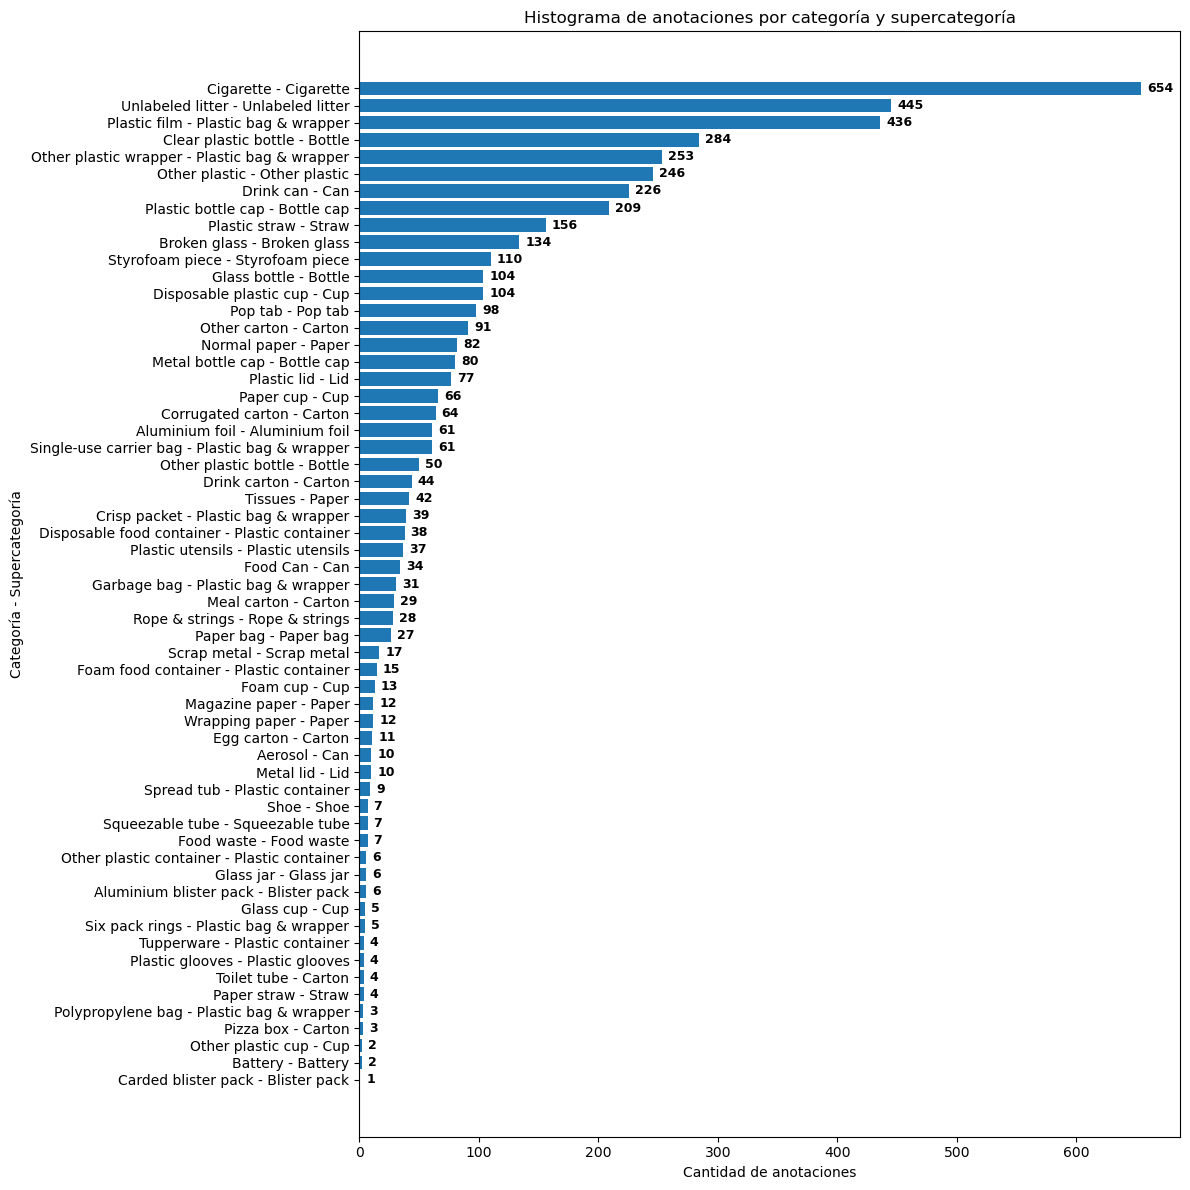

In [322]:
# Agrupar por 'category' y mantener 'supercategory', contar ocurrencias
category_counts = df_ann.groupby(['category', 'supercategory']).size().reset_index(name='count')
category_counts.sort_values(by='count', ascending=True, inplace=True)

# Crear una columna combinada "category - supercategory"
category_counts['cat_label'] = category_counts['category'] + " - " + category_counts['supercategory']

# Mostrar el número de categorías distintas
print(f"Número de categorías distintas: {category_counts['category'].nunique()}")


# Graficar histograma horizontal (barras apiladas verticalmente)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

bars = ax.barh(category_counts['cat_label'], category_counts['count'])

ax.set_xlabel('Cantidad de anotaciones')
ax.set_ylabel('Categoría - Supercategoría')
ax.set_title('Histograma de anotaciones por categoría y supercategoría')

# Poner valor al final de la barra
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5,                       # un poco a la derecha del final de la barra
            bar.get_y() + bar.get_height()/2,
            str(int(width)),
            va='center', ha='left', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()



In [323]:
# Obtener el primer (Q1) y tercer cuartil (Q3) de la columna 'count' en category_counts
q1 = category_counts['count'].quantile(0.25)
median = category_counts['count'].median()
q3 = category_counts['count'].quantile(0.75)

print(f"Primer cuartil (Q1): {q1}")
print(f"Mediana: {median}")
print(f"Tercer cuartil (Q3): {q3}")


Primer cuartil (Q1): 7.0
Mediana: 31.0
Tercer cuartil (Q3): 86.5


### Unión de todas las categorías menores a Q1 (frecuencia <= 7)

Estas categorías pasarán a ser "Other trash"

In [324]:
# Obtener los ids de las categorías cuya frecuencia es menor a q1
minor_cats_1 = category_counts[category_counts['count'] < q1]['category'].tolist()

# Mapear los nombres de categoría a sus ids usando cat_map
minor_cats_1 = [cat_id for cat_id, (cat_name, _) in cat_map.items() if cat_name in minor_cats_1]

print(minor_cats_1)

[1, 2, 3, 13, 19, 23, 24, 26, 37, 41, 44, 47, 48, 56]


In [325]:
for cat_id in minor_cats_1:
    print(f"Categoría {cat_id} - {cat_map[cat_id][0]} - {cat_map[cat_id][1]} tiene frecuencia menor a Q1 ({q1})")

Categoría 1 - Battery - Battery tiene frecuencia menor a Q1 (7.0)
Categoría 2 - Aluminium blister pack - Blister pack tiene frecuencia menor a Q1 (7.0)
Categoría 3 - Carded blister pack - Blister pack tiene frecuencia menor a Q1 (7.0)
Categoría 13 - Toilet tube - Carton tiene frecuencia menor a Q1 (7.0)
Categoría 19 - Pizza box - Carton tiene frecuencia menor a Q1 (7.0)
Categoría 23 - Glass cup - Cup tiene frecuencia menor a Q1 (7.0)
Categoría 24 - Other plastic cup - Cup tiene frecuencia menor a Q1 (7.0)
Categoría 26 - Glass jar - Glass jar tiene frecuencia menor a Q1 (7.0)
Categoría 37 - Six pack rings - Plastic bag & wrapper tiene frecuencia menor a Q1 (7.0)
Categoría 41 - Polypropylene bag - Plastic bag & wrapper tiene frecuencia menor a Q1 (7.0)
Categoría 44 - Tupperware - Plastic container tiene frecuencia menor a Q1 (7.0)
Categoría 47 - Other plastic container - Plastic container tiene frecuencia menor a Q1 (7.0)
Categoría 48 - Plastic glooves - Plastic glooves tiene frecuencia 

In [326]:
# Cambiar el category_id a 60 para las anotaciones cuya categoría está en minor_cats_1
for ann in annotations_cleaned['annotations']:
    if ann['category_id'] in minor_cats_1:
        ann['category_id'] = 60

# Agregar la categoría "Other trash" con id 60 si no existe ya
if not any(cat['id'] == 60 for cat in annotations_cleaned['categories']):
    annotations_cleaned['categories'].append({
        'id': 60,
        'name': 'Other trash',
        'supercategory': 'Other trash'
    })

Número de categorías distintas: 46


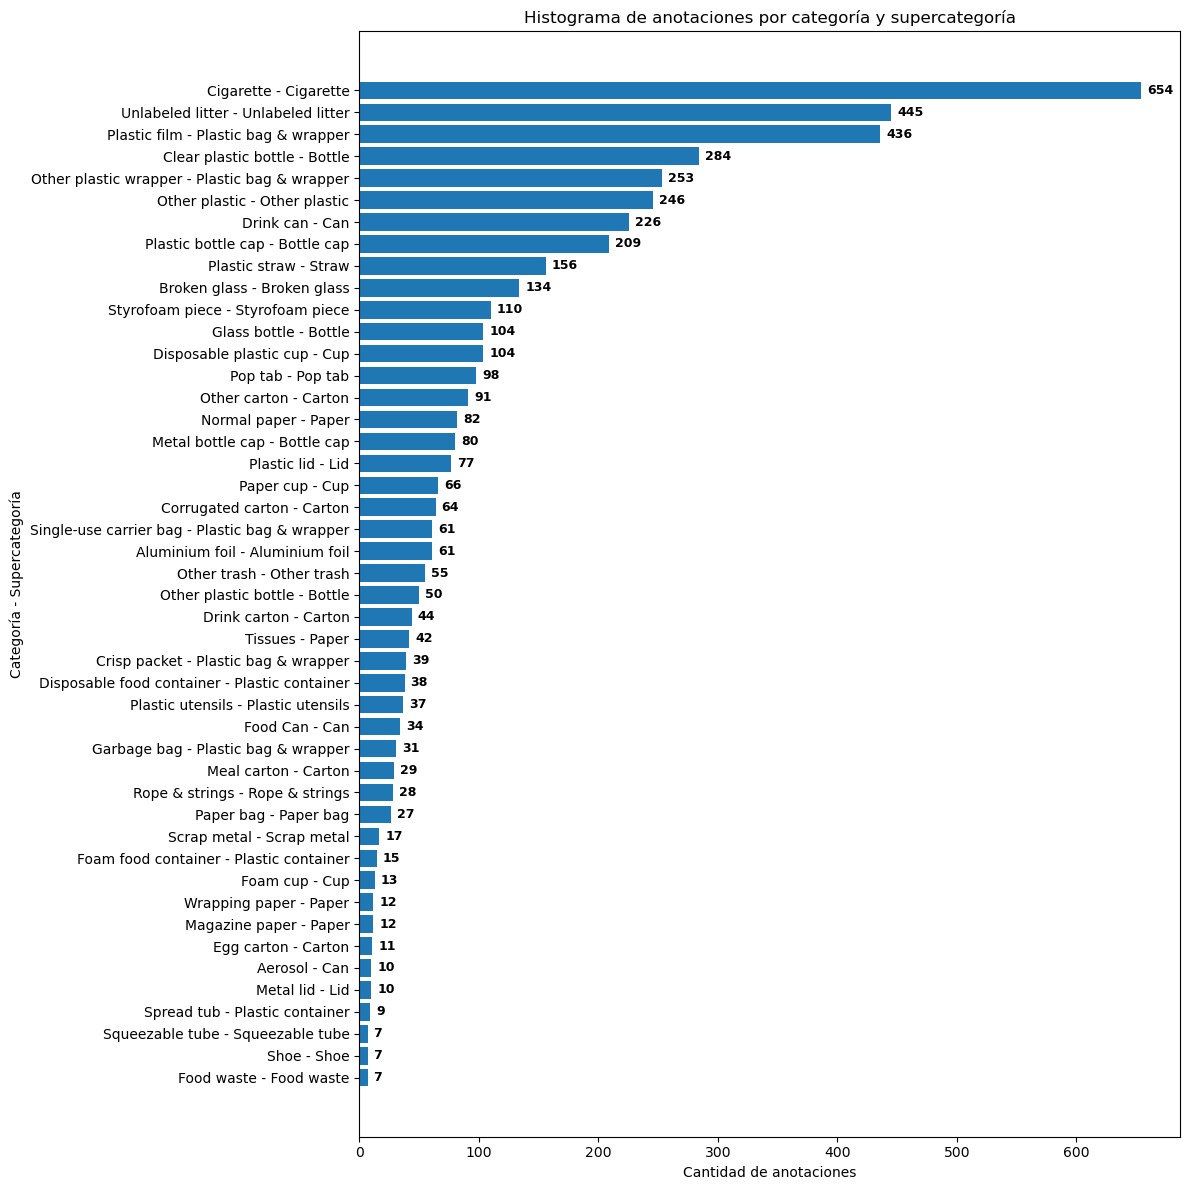

In [327]:
cat_map_final = {cat['id']: (cat['name'], cat['supercategory']) for cat in annotations_cleaned['categories']}

df_ann_final = pd.DataFrame([
    {
        "id": ann['id'],
        "img_id": ann['image_id'],
        "category": cat_map_final[ann['category_id']][0],
        "supercategory": cat_map_final[ann['category_id']][1]
    }
    for ann in annotations_cleaned['annotations']
])

df_ann_final.head()

category_counts = df_ann_final.groupby(['category', 'supercategory']).size().reset_index(name='count')
category_counts.sort_values(by='count', ascending=True, inplace=True)

# Crear una columna combinada "category - supercategory"
category_counts['cat_label'] = category_counts['category'] + " - " + category_counts['supercategory']

# Mostrar el número de categorías distintas
print(f"Número de categorías distintas: {category_counts['category'].nunique()}")

fig, ax = plt.subplots(figsize=(12, 12))
bars = ax.barh(category_counts['cat_label'], category_counts['count'])

ax.set_xlabel('Cantidad de anotaciones')
ax.set_ylabel('Categoría - Supercategoría')
ax.set_title('Histograma de anotaciones por categoría y supercategoría')

# Poner valor al final de la barra
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5,                       # un poco a la derecha del final de la barra
            bar.get_y() + bar.get_height()/2,
            str(int(width)),
            va='center', ha='left', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()



### Eliminación de las categorías sin elementos
Ahora que algunas categorías se han unido, es necesario limpiar las categorías sin elementos


In [328]:
# Obtener el conjunto de nombres de categorías presentes en category_counts
categories_in_counts = set(category_counts['category'])

# Filtrar las categorías en annotations_cleaned['categories']
annotations_cleaned['categories'] = [
    cat for cat in annotations_cleaned['categories']
    if cat['name'] in categories_in_counts
]

print(f"Categorías originales: {len(annotations['categories'])}")
print(f"Categorías restantes: {len(annotations_cleaned['categories'])}")

Categorías originales: 60
Categorías restantes: 46


# 3. Guardado del archivo de anotaciones limpio

Una vez limpiado el archivo de anotaciones se puede almacenar en disco y posteriormente crear el dataset de entrenamiento y evaluación del modelo.

In [329]:
print(f"Conteo inicial de anotaciones: {len(annotations['annotations'])}")
print(f"Conteo final de anotaciones: {len(annotations_cleaned['annotations'])}")

print(f"\tConteo de anotaciones eliminados: {len(annotations['annotations']) - len(annotations_cleaned['annotations'])}")

Conteo inicial de anotaciones: 4784
Conteo final de anotaciones: 4625
	Conteo de anotaciones eliminados: 159


In [330]:
print(f"Conteo inicial de imágenes: {len(annotations['images'])}")
print(f"Conteo final de imágenes: {len(annotations_cleaned['images'])}")

print(f"\tConteo de imágenes eliminados: {len(annotations['images']) - len(annotations_cleaned['images'])}")


Conteo inicial de imágenes: 1500
Conteo final de imágenes: 1485
	Conteo de imágenes eliminados: 15


In [331]:
with open(f'{taco_trash_dataset_data_path}/annotations_cleaned.json', 'w', encoding='utf-8') as f:
    json.dump(annotations_cleaned, f, ensure_ascii=False, indent=2)
print(f"Archivo de anotaciones limpio guardado en '{taco_trash_dataset_data_path}/annotations_cleaned.json'")

Archivo de anotaciones limpio guardado en 'datasets/kneroma/tacotrashdataset/versions/3/data/annotations_cleaned.json'


# 4. Creación del dataset de entremiento y validación (directorios YOLO)

In [332]:
# en el caso de la variable ANN_PATH se puede seleccionar el archivo de anotaciones original o el limpio
# ==== Rutas (AJUSTA ESTAS DOS) ====

ANN_PATH = f'{taco_trash_dataset_data_path}/annotations_cleaned.json' # Ruta al COCO JSON
SRC_IMAGES_ROOT = f'{taco_trash_dataset_data_path}'                   # Carpeta base que contiene batch_1/, batch_10/, etc.


In [333]:
import os
import json
import shutil
from pathlib import Path
from pycocotools.coco import COCO


# ==== Salida ====
OUT_TMP = Path("tmp_2")
OUT_YOLO_IMAGES = OUT_TMP / "images"
OUT_YOLO_LABELS = OUT_TMP / "labels"
OUT_YOLO_IMAGES.mkdir(parents=True, exist_ok=True)
OUT_YOLO_LABELS.mkdir(parents=True, exist_ok=True)

# ==== Cargar COCO ====
coco = COCO(ANN_PATH)

# Asegura que estas rutas sean instancias de Path
ANN_PATH = Path(ANN_PATH) if isinstance(ANN_PATH, str) else ANN_PATH
SRC_IMAGES_ROOT = Path(SRC_IMAGES_ROOT) if isinstance(SRC_IMAGES_ROOT, str) else SRC_IMAGES_ROOT


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [334]:
# --- Remapeo de IDs de clases COCO → YOLO (0..N-1) y exportación de labels ---
from pathlib import Path
import json
import shutil

# Asegura que SRC_IMAGES_ROOT, OUT_YOLO_IMAGES y OUT_YOLO_LABELS sean Path
SRC_IMAGES_ROOT = Path(SRC_IMAGES_ROOT) if not isinstance(SRC_IMAGES_ROOT, Path) else SRC_IMAGES_ROOT
OUT_YOLO_IMAGES = Path(OUT_YOLO_IMAGES) if not isinstance(OUT_YOLO_IMAGES, Path) else OUT_YOLO_IMAGES
OUT_YOLO_LABELS = Path(OUT_YOLO_LABELS) if not isinstance(OUT_YOLO_LABELS, Path) else OUT_YOLO_LABELS

OUT_YOLO_IMAGES.mkdir(parents=True, exist_ok=True)
OUT_YOLO_LABELS.mkdir(parents=True, exist_ok=True)

# 1) Mapear categorías COCO a un rango 0..N-1 con orden estable por id original
cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)
cats_sorted = sorted(cats, key=lambda c: c["id"])  # orden estable por id original

catid_to_yolo = {c["id"]: i for i, c in enumerate(cats_sorted)}
yolo_names = [c["name"] for c in cats_sorted]      # En el mismo orden

print(f"Total categorías: {len(cats_sorted)}")
print({c['name']: catid_to_yolo[c['id']] for c in cats_sorted})

# (Opcional) Exporta el mapeo para referencia
mapping_path = OUT_YOLO_LABELS.parent / "class_mapping.json"
with open(mapping_path, "w", encoding="utf-8") as mf:
    json.dump(
        {
            "yolo_names_ordered": yolo_names,
            "coco_id_to_yolo_id": catid_to_yolo
        },
        mf,
        ensure_ascii=False,
        indent=2
    )
print(f"Guardado mapeo de clases en: {mapping_path}")

# 2) Procesar imágenes y escribir etiquetas YOLO remapeadas
img_ids = coco.getImgIds()
print(f"Total imágenes en COCO: {len(img_ids)}")

saltadas_sin_img = 0
saltadas_sin_ann = 0
saltadas_bbox_invalid = 0
saltadas_cat_desconocida = 0

for img_id in img_ids:
    img_info = coco.loadImgs([img_id])[0]
    file_name = img_info["file_name"]  # p.ej. "batch_1/000006.jpg"
    width = img_info["width"]
    height = img_info["height"]

    # Ruta origen de la imagen en disco (con fallback por extensión)
    src_img = SRC_IMAGES_ROOT / file_name
    if not src_img.exists():
        alt = None
        stem = Path(str(src_img.with_suffix("")))  # evita errores si llega como str
        for ext in [".jpg", ".JPG", ".jpeg", ".JPEG", ".png", ".PNG", ".webp", ".WEBP"]:
            cand = Path(str(stem) + ext)
            if cand.exists():
                alt = cand
                break
        if alt is None:
            print(f"[AVISO] No se encontró la imagen: {src_img}")
            saltadas_sin_img += 1
            continue
        src_img = alt

    # Copiar imagen a destino (aplana subcarpetas con '_')
    dst_img = OUT_YOLO_IMAGES / file_name.replace('/', '_')
    dst_img.parent.mkdir(parents=True, exist_ok=True)
    if not dst_img.exists():
        shutil.copy2(src_img, dst_img)

    # Recolectar anotaciones de esta imagen
    ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    annotations = coco.loadAnns(ann_ids)

    # Archivo de etiquetas YOLO
    dst_lbl = OUT_YOLO_LABELS / (dst_img.stem + ".txt")
    lines = []

    if not annotations:
        # YOLO permite archivo vacío. Si prefieres, puedes no crearlo.
        with open(dst_lbl, "w", encoding="utf-8") as f:
            f.write("")
        saltadas_sin_ann += 1
        continue

    for annotation in annotations:
        # Filtra crowd
        if annotation.get("iscrowd", 0) == 1:
            continue

        # Remapeo categoría: si no está en el mapeo, descarta
        cls_coco = annotation.get("category_id")
        if cls_coco not in catid_to_yolo:
            print(f"[AVISO] category_id desconocido en ann {annotation.get('id')}: {cls_coco}")
            saltadas_cat_desconocida += 1
            continue
        cls_yolo = catid_to_yolo[cls_coco]

        # Validación bbox
        bbox = annotation.get("bbox", None)
        if (
            not isinstance(bbox, list) or
            len(bbox) != 4 or
            not all(isinstance(v, (int, float)) for v in bbox)
        ):
            print(f"[AVISO] Anotación inválida, ID: {annotation.get('id')}, bbox: {bbox}")
            saltadas_bbox_invalid += 1
            continue

        x, y, w, h = bbox
        if w < 1 or h < 1:
            # Si ancho/alto < 1 px, descartamos (evita cajas degeneradas)
            continue

        # Convertir a centro y normalizar
        x_c = round((x + w / 2.0) / width, 6)
        y_c = round((y + h / 2.0) / height, 6)
        w_n = round(w / width, 6)
        h_n = round(h / height, 6)

        # Clampeo [0,1]
        x_c = min(max(x_c, 0.0), 1.0)
        y_c = min(max(y_c, 0.0), 1.0)
        w_n = min(max(w_n, 0.0), 1.0)
        h_n = min(max(h_n, 0.0), 1.0)

        lines.append(f"{cls_yolo} {x_c:.6f} {y_c:.6f} {w_n:.6f} {h_n:.6f}")

    # Escribir etiquetas (puede quedar vacío si todas las anns se filtraron)
    with open(dst_lbl, "w", encoding="utf-8") as f:
        f.write("\n".join(lines))

print(f"Hecho. Imágenes en: {OUT_YOLO_IMAGES} | Labels en: {OUT_YOLO_LABELS}")
print(f"[RESUMEN] sin_imagen={saltadas_sin_img}, sin_anotaciones={saltadas_sin_ann}, bbox_invalidas={saltadas_bbox_invalid}, cat_desconocida={saltadas_cat_desconocida}")
print("Orden de nombres YOLO:", yolo_names)


Total categorías: 46
{'Aluminium foil': 0, 'Other plastic bottle': 1, 'Clear plastic bottle': 2, 'Glass bottle': 3, 'Plastic bottle cap': 4, 'Metal bottle cap': 5, 'Broken glass': 6, 'Food Can': 7, 'Aerosol': 8, 'Drink can': 9, 'Other carton': 10, 'Egg carton': 11, 'Drink carton': 12, 'Corrugated carton': 13, 'Meal carton': 14, 'Paper cup': 15, 'Disposable plastic cup': 16, 'Foam cup': 17, 'Food waste': 18, 'Plastic lid': 19, 'Metal lid': 20, 'Other plastic': 21, 'Magazine paper': 22, 'Tissues': 23, 'Wrapping paper': 24, 'Normal paper': 25, 'Paper bag': 26, 'Plastic film': 27, 'Garbage bag': 28, 'Other plastic wrapper': 29, 'Single-use carrier bag': 30, 'Crisp packet': 31, 'Spread tub': 32, 'Disposable food container': 33, 'Foam food container': 34, 'Plastic utensils': 35, 'Pop tab': 36, 'Rope & strings': 37, 'Scrap metal': 38, 'Shoe': 39, 'Squeezable tube': 40, 'Plastic straw': 41, 'Styrofoam piece': 42, 'Unlabeled litter': 43, 'Cigarette': 44, 'Other trash': 45}
Guardado mapeo de cla

In [335]:
try:
    import splitfolders
except ImportError:
    !pip install split-folders
    import splitfolders
print("Instalación completada")

Instalación completada


In [336]:
# Divide el dataset en train, val, test (80%, 10%, 10%)
# Asegúrate de que OUT_TMP contenga las carpetas 'images' y 'labels' con los datos procesados
# Se puede cambiar el ratio si se desea para disminuir el tamaño del dataset

OUT_YOLO_DATASET = Path("taco")
splitfolders.ratio(OUT_TMP, output=OUT_YOLO_DATASET, seed=1337, ratio=(.6, 0.2,0.2))
print("Creación del dataset completada. Verifica la carpeta 'taco/' para los conjuntos de datos train, val y test.")

Copying files: 2970 files [00:05, 562.86 files/s] 

Creación del dataset completada. Verifica la carpeta 'taco/' para los conjuntos de datos train, val y test.


## Agregación de imágenes de fondo vacías
Se agregarán imágenes con fondos sin basura y sin anotaciones en la carpeta de entrenamiento para que el modelo pueda aprender dicho patrón.

In [337]:
#TODO descargar imágenes de fondo vacías

In [338]:
from pathlib import Path
import shutil
import random


PROPORTION = 0.3  # Proporción de imágenes de fondo a añadir

EXTRA_BG_IMAGES = Path("datasets/dataset_fondos_yandri/Images")   # carpeta con imágenes sin objeto
OUT_YOLO_IMAGES_TRAIN = Path("taco/train/images") 
OUT_YOLO_LABELS_TRAIN = Path("taco/train/labels") 


valid_exts = {".jpg", ".jpeg", ".png", ".webp", ".bmp", ".tif", ".tiff"}

total_imgs = [img for img in EXTRA_BG_IMAGES.rglob("*") if img.suffix.lower() in valid_exts]

# seleccionar una proporción
num_to_add = max(1, int(len(total_imgs) * PROPORTION)) if total_imgs else 0
selected_imgs = random.sample(total_imgs, num_to_add) if num_to_add > 0 else []

print(selected_imgs)
added = 0
for img in selected_imgs:

    # nombre destino (aplanando subcarpetas con '_', igual a tu lógica si la usas)
    dst_img = OUT_YOLO_IMAGES_TRAIN / img.name
    shutil.copy2(img, dst_img)

    # label vacío
    dst_lbl = OUT_YOLO_LABELS_TRAIN / (dst_img.stem + ".txt")
    dst_lbl.write_text("", encoding="utf-8")
    added += 1

# print(f"Imágenes de fondo añadidas: {added}")
print(f"Imágenes de fondo añadidas: {added} de {len(total_imgs)} disponibles (proporción {PROPORTION})")



[PosixPath('datasets/dataset_fondos_yandri/Images/3485599424_94de8ede51.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/1089755335_0bfbfd30e6.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/23445819_3a458716c1.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/437917001_ae1106f34e.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/2899622876_b673b04967.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/1048710776_bb5b0a5c7c.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/2271890493_da441718ba.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/343662720_39e4067cd1.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/3171651115_e07b9d08f6.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/364213568_7f83e7d144.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/3208553539_2bf6c6d162.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/3429465163_fb8ac7ce7f.jpg'), PosixPath('datasets/dataset_fondos_yandri/Images/3125041578_c1f2d73b

# ADICIONAL: creación del archivo YAML

para el entramiento de yolo se puede proveer un arhivo de configuraciones. Se puede ejecutar esta celda para crearlos automáticamente.

In [339]:
# En el caso de la variable ANN_PATH_YAML se puede seleccionar el archivo de anotaciones original o el limpio
import pandas as pd
import yaml
from pycocotools.coco import COCO

ANN_PATH_YAML = f'{taco_trash_dataset_data_path}/annotations_cleaned.json'
OUT_YAML = 'taco_trash.yaml'
coco = COCO(ANN_PATH_YAML)

cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)
# Orden estable por id original
cats_sorted = sorted(cats, key=lambda c: c["id"])
catid_to_yolo = {c["id"]: i for i, c in enumerate(cats_sorted)}
class_names = [c['name'] for c in cats_sorted]

# Crear el diccionario para el archivo YAML
yaml_dict = {
    'train': f"{OUT_YOLO_DATASET}/train/images",
    'val': f"{OUT_YOLO_DATASET}/val/images",
    'test': f"{OUT_YOLO_DATASET}/test/images",
    'nc': len(class_names),
    'names': class_names
}

# Guardar el archivo taco_trash.yaml
with open(OUT_YAML, 'w') as f:
    yaml.dump(yaml_dict, f, allow_unicode=True)

print(f"Archivo YAML guardado en '{OUT_YAML}' con {len(class_names)} clases.")

loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
Archivo YAML guardado en 'taco_trash.yaml' con 46 clases.


# Otras opciones para tratan de limpiar el dataset
* quitar las anotaciones de las imagenes que poseen muchas anotaciones con tamaños de cajas muy pequeñas. Esto con el fin que de la ventana de vision del modelo no tenga que variar tanto
* agregar la etiquetas Background e imagenes de ejemplo
